# Importing Libraries & Reading Data

In [141]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

## Loading & Reading Dataset

In [142]:
file_path = '/content/clean_data_after_eda.csv'
data = pd.read_csv(file_path)

df = pd.read_csv('./clean_data_after_eda.csv')
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.000131,4.100838e-05,9.084737e-04,2.086294,99.530517,44.235794,2.086425,9.953056e+01,4.423670e+01,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000003,1.217891e-03,0.000000e+00,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000004,9.450150e-08,0.000000e+00,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000e+00,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.000011,2.896760e-06,4.860000e-10,0.000000,0.000000,0.000000,0.000011,2.896760e-06,4.860000e-10,0


# Feature Engineering

In [143]:
price_data = pd.read_csv('price_data.csv')
price_data["price_date"] = pd.to_datetime(price_data["price_date"], format='%Y-%m-%d')
price_data.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [144]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_data.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001


## Max Price Changes Across Periods and Months

In [145]:
# Load the client and price data
client_data = pd.read_csv('/content/client_data.csv')
price_data = pd.read_csv('/content/price_data.csv')

price_data["price_date"] = pd.to_datetime(price_data["price_date"], format='%Y-%m-%d')

In [146]:
# Group by 'id' to calculate average price changes across periods
average_price_changes = price_data.groupby('id').agg({
    'price_off_peak_var': 'mean',
    'price_peak_var': 'mean',
    'price_mid_peak_var': 'mean',
    'price_off_peak_fix': 'mean',
    'price_peak_fix': 'mean',
    'price_mid_peak_fix': 'mean'
}).reset_index()

In [147]:
# Calculate the average difference across peak, mid-peak, and off-peak periods
average_price_changes['avg_price_change_var'] = (
    average_price_changes['price_peak_var'] - average_price_changes['price_off_peak_var']
).abs() + (
    average_price_changes['price_mid_peak_var'] - average_price_changes['price_off_peak_var']
).abs()

average_price_changes['avg_price_change_fix'] = (
    average_price_changes['price_peak_fix'] - average_price_changes['price_off_peak_fix']
).abs() + (
    average_price_changes['price_mid_peak_fix'] - average_price_changes['price_off_peak_fix']
).abs()

In [148]:
# Group by 'id' to calculate maximum price changes across periods and months
max_price_changes = price_data.groupby('id').agg({
    'price_off_peak_var': 'max',
    'price_peak_var': 'max',
    'price_mid_peak_var': 'max',
    'price_off_peak_fix': 'max',
    'price_peak_fix': 'max',
    'price_mid_peak_fix': 'max'
}).reset_index()

In [149]:
# Calculate the maximum difference across peak, mid-peak, and off-peak periods
max_price_changes['max_price_change_var'] = (
    max_price_changes['price_peak_var'] - max_price_changes['price_off_peak_var']
).abs() + (
    max_price_changes['price_mid_peak_var'] - max_price_changes['price_off_peak_var']
).abs()

max_price_changes['max_price_change_fix'] = (
    max_price_changes['price_peak_fix'] - max_price_changes['price_off_peak_fix']
).abs() + (
    max_price_changes['price_mid_peak_fix'] - max_price_changes['price_off_peak_fix']
).abs()

# Display the processed data
average_price_changes.head(), max_price_changes.head()

(                                 id  price_off_peak_var  price_peak_var  \
 0  0002203ffbb812588b632b9e628cc38d            0.124338        0.103794   
 1  0004351ebdd665e6ee664792efc4fd13            0.146426        0.000000   
 2  0010bcc39e42b3c2131ed2ce55246e3c            0.181558        0.000000   
 3  0010ee3855fdea87602a5b7aba8e42de            0.118757        0.098292   
 4  00114d74e963e47177db89bc70108537            0.147926        0.000000   
 
    price_mid_peak_var  price_off_peak_fix  price_peak_fix  price_mid_peak_fix  \
 0            0.073160           40.701732       24.421038           16.280694   
 1            0.000000           44.385450        0.000000            0.000000   
 2            0.000000           45.319710        0.000000            0.000000   
 3            0.069032           40.647427       24.388455           16.258971   
 4            0.000000           44.266930        0.000000            0.000000   
 
    avg_price_change_var  avg_price_change_fix  

This code calculates and displays the average and maximum price changes for energy and power prices across peak, mid-peak, and off-peak periods for each client company. This is done to capture the variance in pricing throughout the year, which can be used to understand potential price volatility and its impact on customer retention.

## Price Volatility Across Months

When thinking from the client's POV, price volatility can indicate how consistent or inconsistent the energy prices are for customers which may lead to customer dissatisfaction and increase churn risk. This is because logically customers (potentially) prefer stable pricing.

In [150]:
# Group by 'id' to calculate the standard deviation (volatility) of monthly prices for peak, mid-peak, and off-peak periods
price_volatility = price_data.groupby('id').agg({
    'price_off_peak_var': 'std',
    'price_peak_var': 'std',
    'price_mid_peak_var': 'std',
    'price_off_peak_fix': 'std',
    'price_peak_fix': 'std',
    'price_mid_peak_fix': 'std'
}).reset_index()

In [151]:
# Rename columns to indicate they represent volatility
price_volatility.rename(columns={
    'price_off_peak_var': 'volatility_off_peak_var',
    'price_peak_var': 'volatility_peak_var',
    'price_mid_peak_var': 'volatility_mid_peak_var',
    'price_off_peak_fix': 'volatility_off_peak_fix',
    'price_peak_fix': 'volatility_peak_fix',
    'price_mid_peak_fix': 'volatility_mid_peak_fix'
}, inplace=True)

price_volatility.head()

,id,volatility_off_peak_var,volatility_peak_var,volatility_mid_peak_var,volatility_off_peak_fix,volatility_peak_fix,volatility_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.003976,0.001989,0.001368,6.341481e-02,0.038049,0.025366
1,0004351ebdd665e6ee664792efc4fd13,0.002197,0.000000,0.000000,8.753223e-02,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.026008,0.000000,0.000000,7.723930e-01,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.005049,0.002580,0.000403,8.507958e-02,0.051048,0.034032
4,00114d74e963e47177db89bc70108537,0.002202,0.000000,0.000000,5.908392e-07,0.000000,0.000000


The volatility of price across months in the code above is done by using "Standard Deviation" where it quantifies the amount of variation in a set of values and shows how much individual price points deviate from the average price over time.

From the calculated price volatility above, a few key findings I noticed are:


1.   Clients with high volatility in volatility_peak_fix or volatility_off_peak_fix may face substantial price fluctuations which could potentially lead to dissatisfaction and risk of churn.
2.   Some clients have consistent zero volatility across multiple periods. Meaning, they are likely to have stable pricing, which could indicate lower churn risk.


## Consumption Patterns

Another thing to think of is analyzing the consuption patters of customers who may be at risk to seasonal spikes or decreasing usage. In the case that a customer's usage suddenly drops, it may indicate that they are seeking alternative gas/energy providers or reducing relience on PowerCo.

In [152]:
# Calculate the ratio of gas consumption to electricity consumption
client_data['gas_to_electricity_ratio'] = client_data['cons_gas_12m'] / client_data['cons_12m']

# Calculate last month's consumption compared to the average monthly consumption over the past year
client_data['last_month_vs_yearly_avg'] = client_data['cons_last_month'] / (client_data['cons_12m'] / 12)

client_data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,gas_to_electricity_ratio,last_month_vs_yearly_avg
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,inf,NaN
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0,0.0,0.000000
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0,0.0,0.000000
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0,0.0,0.000000
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0,0.0,1.426441


Here, I've created the feature to find the consumption patters of PowerCo's customer. The variable gas_to_electricity_ration is created to help identify customers who rely more on gas than electricity and vice versa, where a high ratio indicate the predominant usage of gas. In contrast, a ration of 0 indicates no gas consumption which implies that these clients purely uses electricity.

This means that customers with a very high ratio might be more sensitve to gas prices and PowerCo should ensure a competitive price to retain them. While vice versa for clients with 0 (or close to zero) ratio.


Furthermore, clients whose last month's consumption is significantly lower than their yearly average could be considering alternative energy sources or preparing to leave. This could be an indication for PowerCo to foucs more on engaging with the customers.

## Date to Months Conversion and Raw Date Removal

This is done to make the predictions easier as we cannot us it in the original form

In [153]:
date_cols = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal', 'price_date']
for col in date_cols:
    if col in client_data.columns:
        client_data[col] = pd.to_datetime(client_data[col], format='%Y-%m-%d')
    if col in price_data.columns:
        price_data[col] = pd.to_datetime(price_data[col], format='%Y-%m-%d')

for col in date_cols:
    if col in client_data.columns:
        client_data[f'month_{col}'] = client_data[col].dt.month
        client_data.drop(col, axis=1, inplace=True)
    if col in price_data.columns:
        price_data[f'month_{col}'] = price_data[col].dt.month
        price_data.drop(col, axis=1, inplace=True)

## Converting Boolean to Binary

In [154]:
df['has_gas'] = df['has_gas'].replace(['t', 'f'], [1, 0])
df.groupby(['has_gas']).agg({'churn': 'mean'})

<ipython-input-154-fa80f5127aae>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['has_gas'] = df['has_gas'].replace(['t', 'f'], [1, 0])


,churn
has_gas,
0,0.100544
1,0.081856


## Convert Categorical Columns to Dummy Variables

In [155]:
categorical_cols = ['channel_sales', 'origin_up']
client_data = pd.get_dummies(client_data, columns=categorical_cols, drop_first=True)

In [156]:
# Identify skewed columns and apply log transformation
skewed_cols = client_data.select_dtypes(include=[np.number]).apply(lambda x: x.skew()).sort_values(ascending=False)
high_skew_cols = skewed_cols[skewed_cols > 1].index

# Apply log transformation to highly skewed columns
for col in high_skew_cols:
    client_data[col] = np.log1p(client_data[col])

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1256: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean


<ipython-input-157-c207a657960e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((client_data["cons_12m"].dropna()), ax=axs[0])
<ipython-input-157-c207a657960e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((client_data["cons_last_month"].dropna()), ax=axs[2])


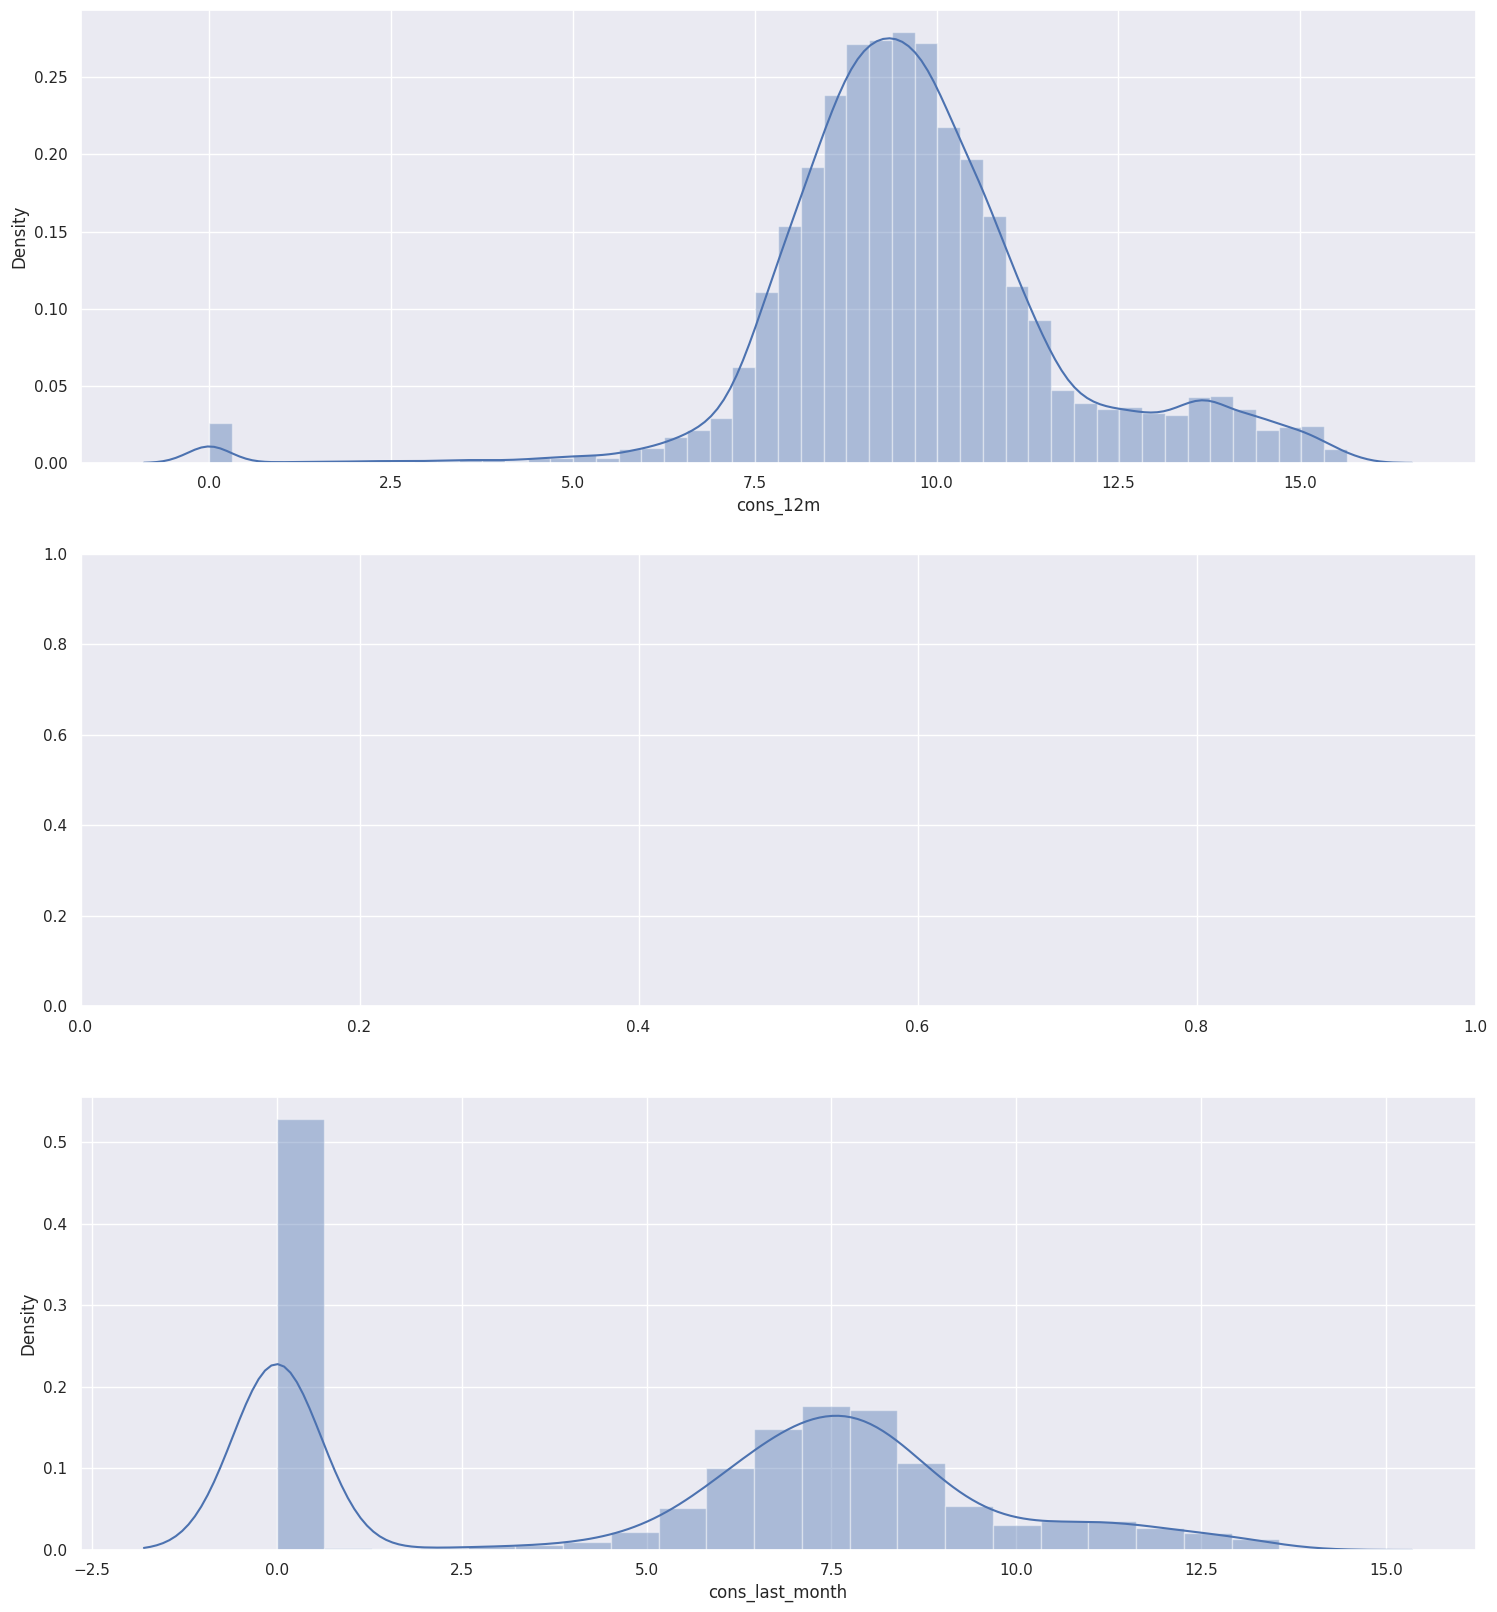

In [157]:
fig, axs = plt.subplots(nrows=3, figsize=(18, 20))
sns.distplot((client_data["cons_12m"].dropna()), ax=axs[0])
sns.distplot((client_data["cons_last_month"].dropna()), ax=axs[2])
plt.show()

# Correlation

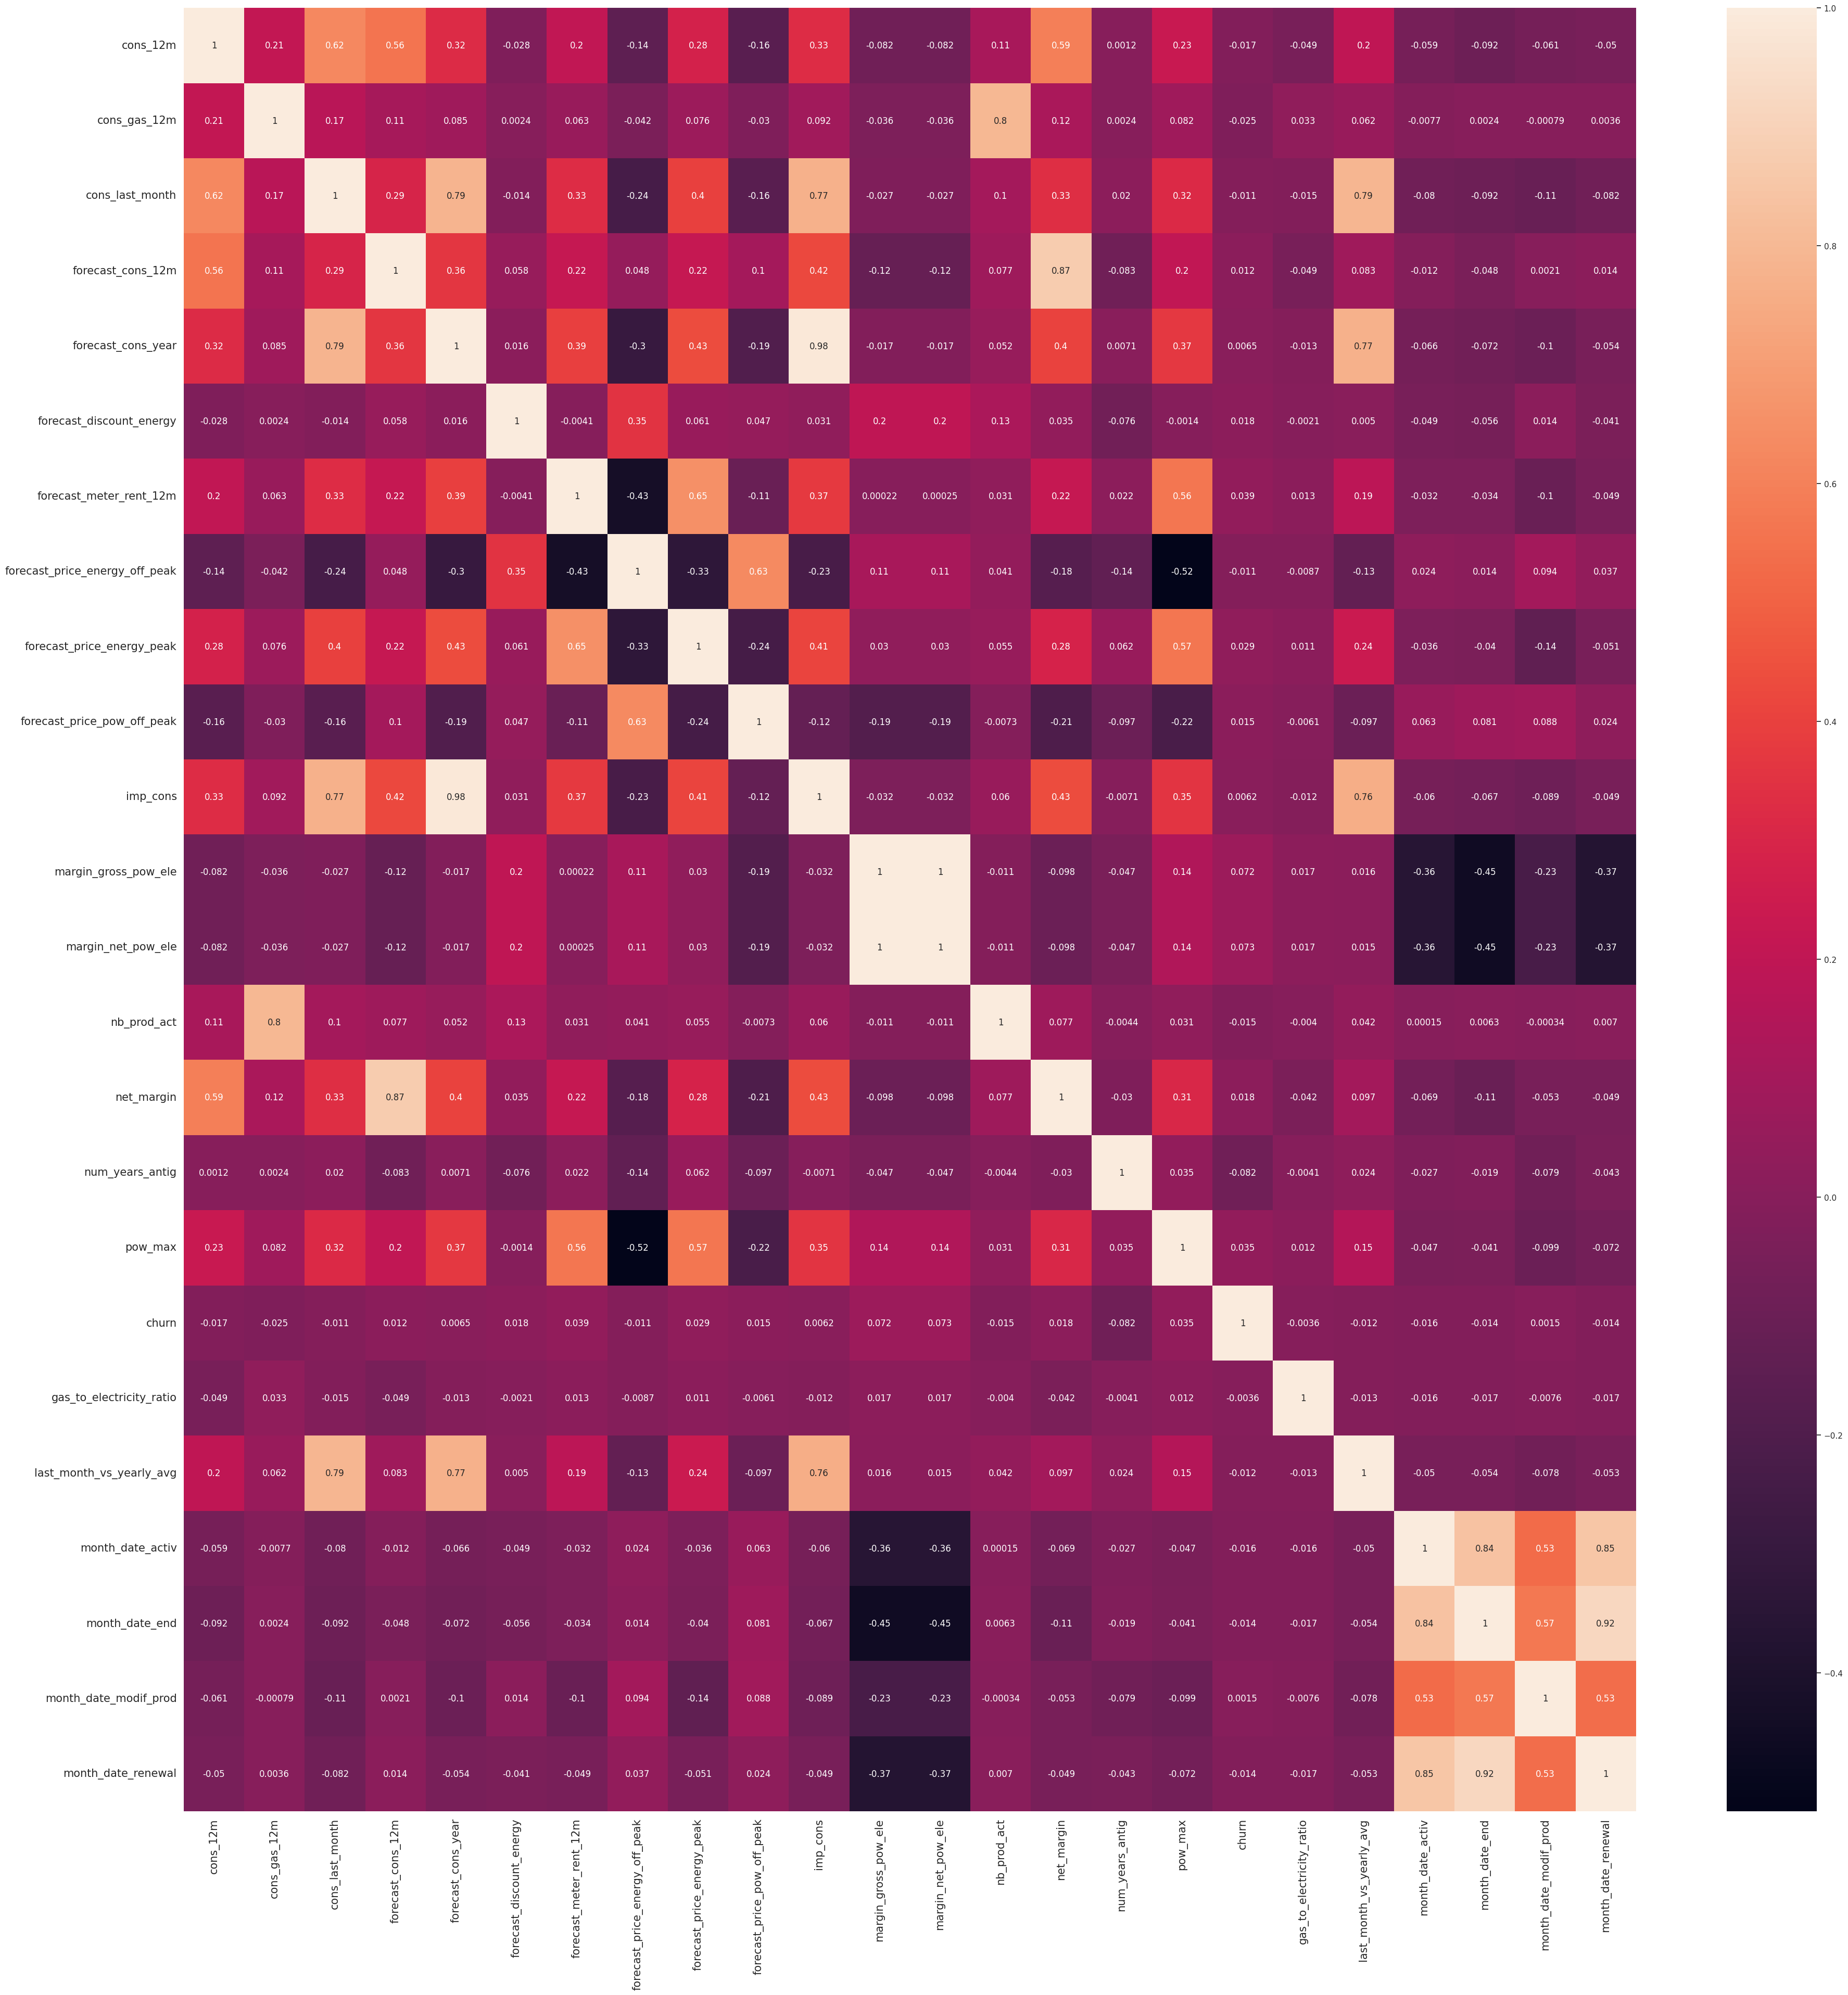

In [174]:
correlation = client_data.select_dtypes(include=np.number).corr()

# Plot correlation
plt.figure(figsize=(45, 45))
sns.heatmap(
    correlation,
    xticklabels=correlation.columns.values,
    yticklabels=correlation.columns.values,
    annot=True,
    annot_kws={'size': 12}
)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()